# Classification with an Academic Success Dataset

Amacımız: Bu projenin amacı yükseköğrenimdeki öğrencilerin akademik riskini tahmin etmektir.

<img src="https://kizilpinarilkokulu.meb.k12.tr/meb_iys_dosyalar/59/02/975391/resimler/2022_03/k_03134141_okul-basarisi-1000x600.jpg">

<a href="https://www.kaggle.com/competitions/playground-series-s4e6/data">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
df.shape

(76518, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [6]:
df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [7]:
df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,23.425076,8.583196,8.882172,125.363971,0.569265,0.003738,0.071382,0.893646,0.315821,0.247393,22.278653,0.006626,0.188871,5.891516,7.352362,4.178520,9.995862,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,14.921164,17.471591,16.803940,12.562328,0.495182,0.061023,0.257463,0.308292,0.464845,0.431500,6.889241,0.081130,1.175296,1.671776,3.508292,2.687995,5.264224,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,4.000000,4.000000,5.000000,118.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.666667,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,7.000000,7.000000,124.600000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,6.000000,7.000000,5.000000,12.166667,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,132.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,23.000000,0.000000,0.000000,6.000000,9.000000,6.000000,13.314286,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [8]:
df["Target"].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

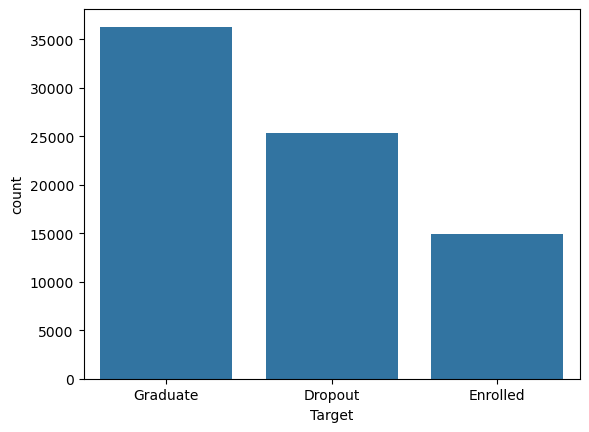

In [9]:
sns.countplot(x=df["Target"]);

In [33]:
d={"Graduate":0,"Dropout":1,"Enrolled":2}

In [11]:
df["Target"]=df["Target"].map(d)

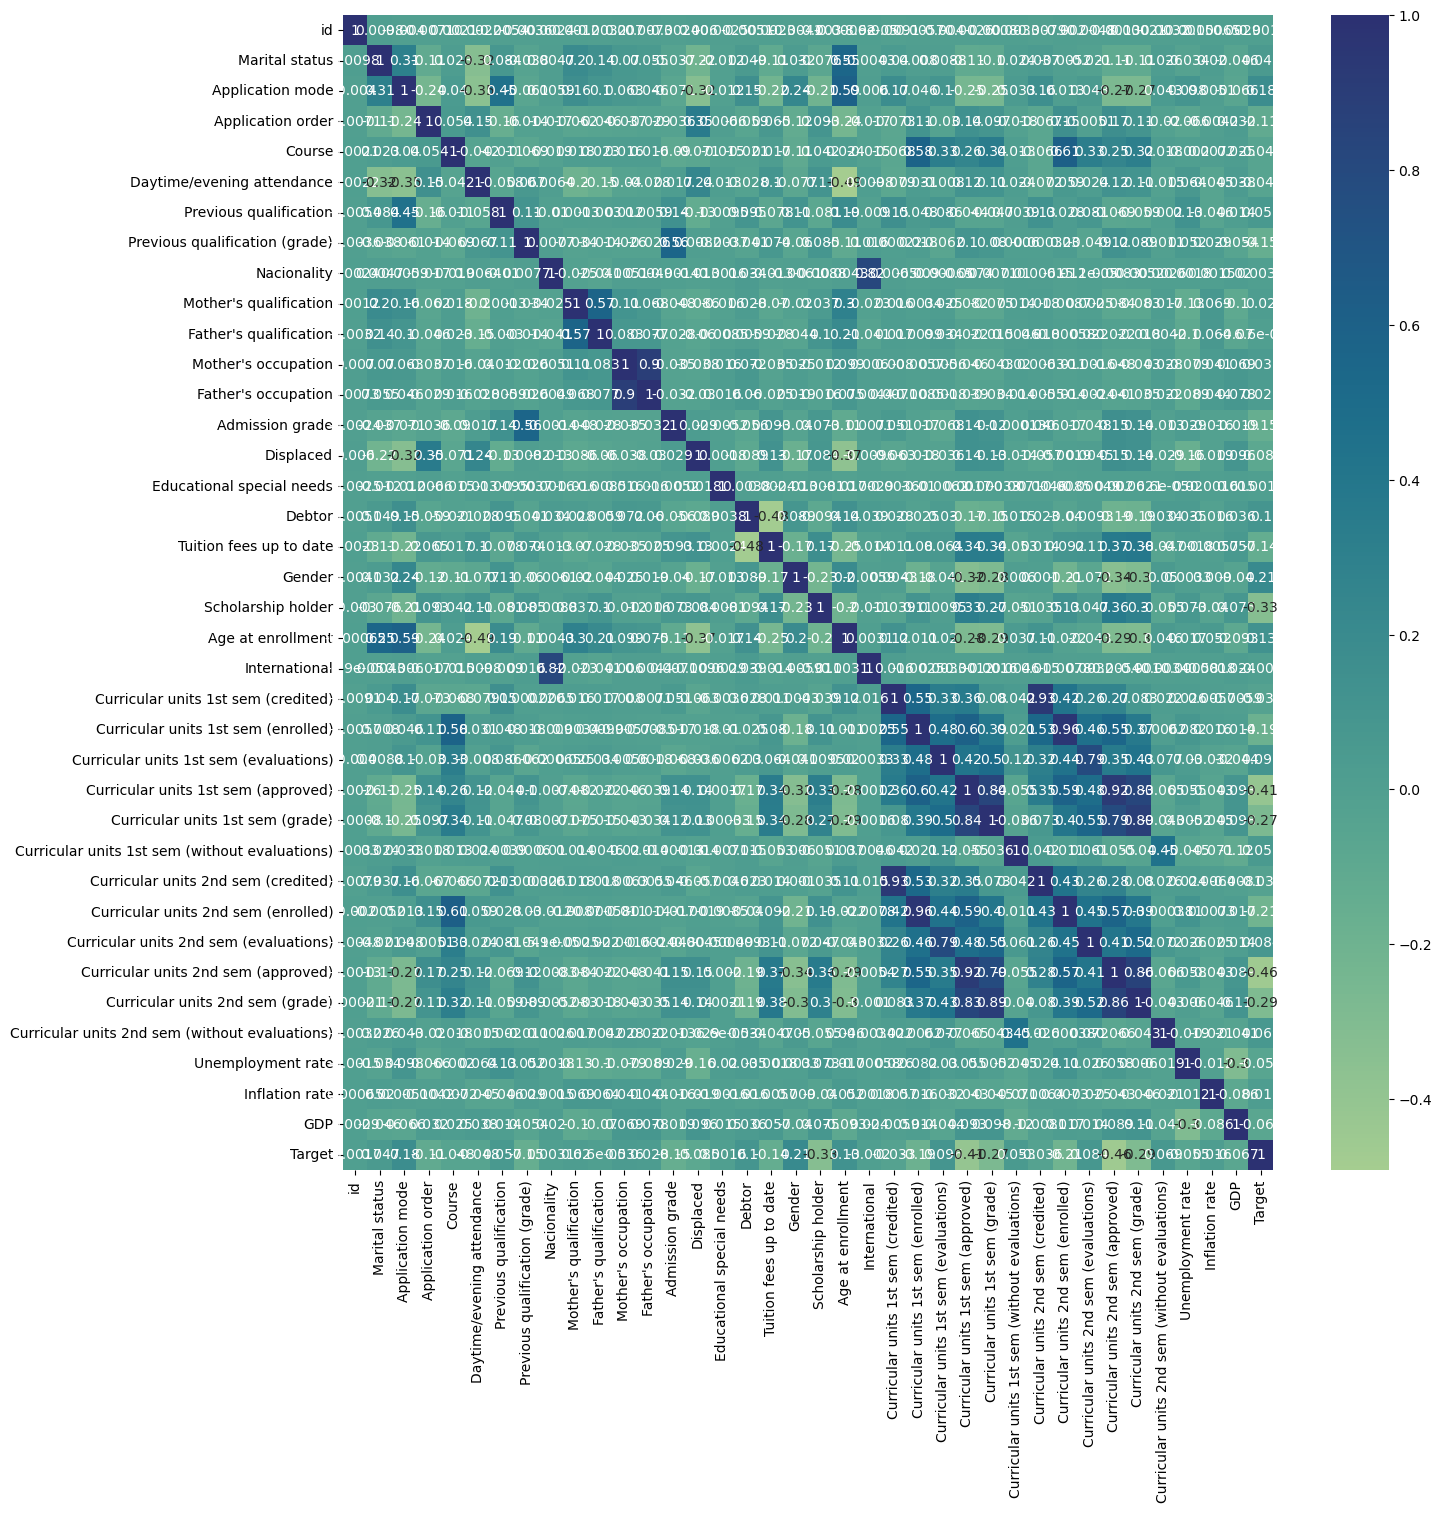

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="crest");

### Modelling

In [13]:
x=df.drop(["id","Target"],axis=1)
y=df["Target"]

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(X, y):
    # Tüm sınıflandırma modellerini tanımlıyorum
    lr = LogisticRegression(max_iter=1000)
    svc = SVC()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr, svc, knn, dt, rf, gb, xgb, mlp]
    algo_names = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'MLP']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Sonuç tablosunu oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=algo_names)

    for algo in algos:
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        
        # average parametresini buraya ekliyorum
        precision.append(precision_score(y_test, y_pred, average='macro'))  # veya 'weighted'
        recall.append(recall_score(y_test, y_pred, average='macro'))  # veya 'weighted'
        f1.append(f1_score(y_test, y_pred, average='macro'))  # veya 'weighted'

    # Sonuçları result tablosuna ekliyorum
    # Sonuçları result tablosuna ekliyorum
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1'] = f1
        
    return result.sort_values('Accuracy', ascending=False)

In [15]:
algo_test_classification(x,y)

,Accuracy,Precision,Recall,F1
XGBoost,0.833181,0.804230,0.789810,0.795951
Gradient Boosting,0.830567,0.802168,0.786907,0.793272
Random Forest,0.826385,0.796965,0.780111,0.787048
Logistic Regression,0.793257,0.759403,0.737750,0.745685
Decision Tree,0.742682,0.696036,0.697194,0.696595
MLP,0.739545,0.629196,0.604848,0.552399
KNN,0.739219,0.701767,0.667748,0.676877
SVC,0.492420,0.392318,0.354264,0.264229


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
xgb = XGBClassifier()

In [20]:
mod=xgb.fit(x_train,y_train)

In [21]:
thmn=xgb.predict(x_test)

In [22]:
accuracy_score(y_test, thmn)

0.8331808677469943

<Axes: >

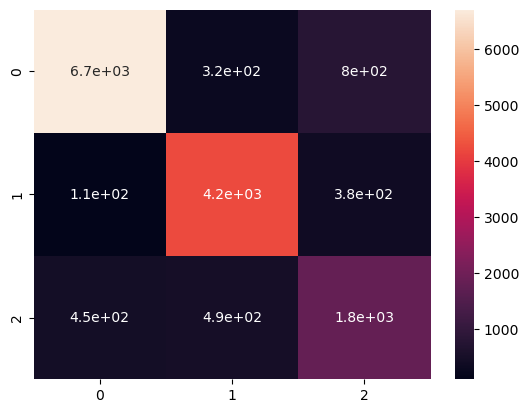

In [23]:
sns.heatmap(confusion_matrix(thmn,y_test),annot=True)

In [24]:
print(classification_report(thmn,y_test))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7812
           1       0.84      0.89      0.87      4722
           2       0.61      0.66      0.63      2770

    accuracy                           0.83     15304
   macro avg       0.79      0.80      0.80     15304
weighted avg       0.84      0.83      0.84     15304



Kaggle daki test dosyamızı yükleyip tahmin ettireceğiz.

In [40]:
test=pd.read_csv("test.csv")

In [41]:
dosya=pd.DataFrame()

In [42]:
dosya["id"]=test["id"]

In [43]:
test=test.drop(["id"],axis=1)

In [44]:
dosya["Target"]=xgb.predict(test)

In [45]:
dt={0:"Graduate",1:"Dropout",2:"Enrolled"}

In [46]:
dosya["Target"]=dosya["Target"].map(dt)

In [48]:
dosya

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [49]:
dosya.to_csv("tahmin1.csv",index=False)

### Deep Learning

In [50]:
x=df.drop(["id","Target"],axis=1)
y=df["Target"]

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import normalize, scale

In [52]:
model=Sequential()
model.add(Dense(120,activation="relu"))  # Modele layer ekliyor # Dense bütün nöronlar bütün nöronlara bağlansın demek
model.add(Dense(80,activation="relu")) # 120 nöron var 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(3,activation="softmax")) # Binary classification olduğu için sigmoid kullandık ! Regression da yok
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"]) # Loss: hata MSE gibi # Optimizer=adam 

In [53]:
x=scale(x) # hepsini aynı birime getirdik

In [55]:
history=model.fit(x,y,epochs=75,batch_size=23, validation_split=.20, verbose=1)

Epoch 1/75
2662/2662 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7871 - loss: 0.5401 - val_accuracy: 0.8168 - val_loss: 0.4761
Epoch 2/75
2662/2662 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8196 - loss: 0.4639 - val_accuracy: 0.8161 - val_loss: 0.4741
Epoch 3/75
2662/2662 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8226 - loss: 0.4598 - val_accuracy: 0.8155 - val_loss: 0.4724
Epoch 4/75
2662/2662 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8243 - loss: 0.4563 - val_accuracy: 0.8174 - val_loss: 0.4708
Epoch 5/75
2662/2662 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8239 - loss: 0.4530 - val_accuracy: 0.8183 - val_loss: 0.4687
Epoch 6/75
2662/2662 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8273 - loss: 0.4478 - val_accuracy: 0.8172 - val_loss: 0.4664
Epoch 7/75
2662/2662 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8284 - loss: 0.4426 - val_accuracy: 0.8185 - val_loss: 0.4653
Epoch 8/75
2662/2662 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8273 - loss: 0.4417 - 

In [56]:
dosya["Target"]=model.predict(test)

1595/1595 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [57]:
dosya["Target"]=dosya["Target"].map(dt)

In [58]:
dosya.to_csv("tahmin2.csv",index=False)

Sonuc olarak verimizi hem ML (83% Accuracy) hem de DL (% Accuracy) ile egittik. Ardından Kaggle'daki test verilerini modelimizi kullanarak tahmin ettirdik. 